In [195]:
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer
import nltk
from sklearn import metrics

import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv('~/Asigmo/AI Ethics/train_humour.csv')

In [11]:
data.text

0       TENNESSEE: We're the best state. Nobody even c...
1       A man inserted an advertisement in the classif...
2       How many men does it take to open a can of bee...
3       Told my mom I hit 1200 Twitter followers. She ...
4       Roses are dead. Love is fake. Weddings are bas...
                              ...                        
7995    Lack of awareness of the pervasiveness of raci...
7996      Why are aspirins white? Because they work sorry
7997    Today, we Americans celebrate our independence...
7998    How to keep the flies off the bride at an Ital...
7999    "Each ounce of sunflower seeds gives you 37% o...
Name: text, Length: 8000, dtype: object

In [12]:
data.sample(20)

,id,text,is_humor,humor_rating,humor_controversy,offense_rating
7968,7969,I saw a guy walking 4 dogs this morning and th...,1,2.00,1.0,0.55
7702,7703,BOOK: She gazed upon the sun-dappled lawn. ME:...,1,1.76,1.0,0.00
6100,6101,Pandas show little interest in company or frie...,0,NaN,NaN,0.00
3986,3987,The word 'infant' originates from the Latin wo...,0,NaN,NaN,0.10
7388,7389,"""The spaces between us, keep getting deeper.' ...",0,NaN,NaN,0.00
7189,7190,Don't chase anyone. Don't beg anyone to stay. ...,0,NaN,NaN,0.00
7838,7839,"Verily, the land does not make anyone holy; it...",0,NaN,NaN,0.00
3646,3647,"Let's talk about sax, baby Let's talk about br...",1,2.38,0.0,0.00
7771,7772,My girlfriends threatened to leave me because ...,1,2.32,0.0,0.00
4973,4974,I thought I won the argument with my wife as t...,1,2.60,1.0,0.00


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  14.,   49.,  157.,  488., 1048., 1219., 1157.,  630.,  152.,
          18.]),
 array([0.1 , 0.49, 0.88, 1.27, 1.66, 2.05, 2.44, 2.83, 3.22, 3.61, 4.  ]),
 <a list of 10 Patch objects>)

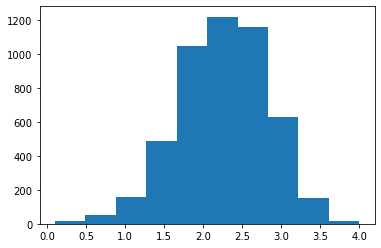

In [13]:
plt.hist(data.humor_rating)

(array([3068.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4932.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

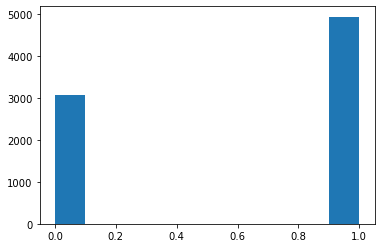

In [14]:
plt.hist(data.is_humor)

In [15]:
data[data.is_humor==0]

,id,text,is_humor,humor_rating,humor_controversy,offense_rating
5,6,"'Trabajo,' the Spanish word for work, comes fr...",0,NaN,NaN,0.00
6,7,I enrolled on some skill training and extra cu...,0,NaN,NaN,0.10
8,9,Men who ejaculated 21 times or more a month ha...,0,NaN,NaN,0.05
9,10,I got REALLY angry today and it wasn't about n...,0,NaN,NaN,0.15
10,11,A dog in Mexico named Frida saved the lives of...,0,NaN,NaN,0.00
...,...,...,...,...,...,...
7989,7990,Swimming provides mental health & mediation. i...,0,NaN,NaN,0.00
7992,7993,Hey folx! All slots are full! Thank you so muc...,0,NaN,NaN,0.00
7994,7995,It's funny how you don't appreciate a thing un...,0,NaN,NaN,0.05
7995,7996,Lack of awareness of the pervasiveness of raci...,0,NaN,NaN,0.25


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   text               8000 non-null   object 
 2   is_humor           8000 non-null   int64  
 3   humor_rating       4932 non-null   float64
 4   humor_controversy  4932 non-null   float64
 5   offense_rating     8000 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 375.1+ KB


In [17]:
data.humor_rating.fillna(value = 0, inplace=True)

In [18]:
data.describe()

,id,is_humor,humor_rating,humor_controversy,offense_rating
count,8000.00000,8000.000000,8000.000000,4932.000000,8000.000000
mean,4000.50000,0.616500,1.393614,0.499797,0.585325
std,2309.54541,0.486269,1.185941,0.500051,0.979955
min,1.00000,0.000000,0.000000,0.000000,0.000000
25%,2000.75000,0.000000,0.000000,0.000000,0.000000
50%,4000.50000,1.000000,1.760000,0.000000,0.100000
75%,6000.25000,1.000000,2.420000,1.000000,0.700000
max,8000.00000,1.000000,4.000000,1.000000,4.850000


In [19]:
df=data.drop(columns=['humor_controversy','id'], axis=1)
df.head()

,text,is_humor,humor_rating,offense_rating
0,TENNESSEE: We're the best state. Nobody even c...,1,2.42,0.2
1,A man inserted an advertisement in the classif...,1,2.50,1.1
2,How many men does it take to open a can of bee...,1,1.95,2.4
3,Told my mom I hit 1200 Twitter followers. She ...,1,2.11,0.0
4,Roses are dead. Love is fake. Weddings are bas...,1,2.78,0.1


In [139]:
from sklearn.model_selection import train_test_split
y_humor = df['is_humor']
X_humor = df.drop(columns='is_humor')
X_humor_train, X_humor_test, y_humor_train, y_humor_test = train_test_split(X_humor, y_humor, test_size = 0.2)

In [140]:
X_humor_train

,text,humor_rating,offense_rating
2884,The CIA publicly acknowledged the existence of...,0.00,0.00
1018,Most people are shocked when they find out how...,2.94,0.00
6594,Some men will never realize what a great woman...,0.00,0.00
7719,Colorism is alive and well in the black comm'y...,0.00,0.40
930,Q: How do you know if a blonde has been sendi...,2.10,1.15
...,...,...,...
1010,Instead of hanging useless wall art that says ...,2.33,0.00
7843,Why don't bisexual people have any friends? Be...,2.00,0.85
4292,A toothbrush that is 6 feet within a toilet ca...,0.00,0.00
2048,Being in a relationship is a full time job. Da...,0.00,0.15


In [141]:
#data_humor=X_humor_train.text.str.lower().str.strip().str.split()
#data_humor

### Remove sopwords and punctuations and digits

In [163]:
with open('/Users/festo.owiny/Asigmo/hahackathon/pos_neg_list/stopwords.txt') as f:
    stop_words = [line.rstrip() for line in f]

In [165]:
#stop_words

In [166]:
X_train_text

0       the cia publicly acknowledged the existence of...
1       most people are shocked when they find out how...
2       some men will never realize what a great woman...
3       colorism is alive and well in the black commy ...
4       q how do you know if a blonde has been sending...
                              ...                        
6395    instead of hanging useless wall art that says ...
6396    why dont bisexual people have any friends beca...
6397    a toothbrush that is feet within a toilet can ...
6398    being in a relationship is a full time job dar...
6399    everybody keeps downvoting my racist jokes its...
Name: text, Length: 6400, dtype: object

In [142]:
import string, re
exclude = set(string.punctuation + string.digits)

def remove_punctuation(x):
    """
    Helper function to remove punctuation from a string
    x: any string
    """
    try:
        x = ''.join(ch for ch in x if ch not in exclude)
    except:
        pass
    res = re.sub(' +', ' ', x)
    return (res)

In [180]:
X_train_text = X_humor_train.text.apply(remove_punctuation).str.strip().str.lower()
X_train_text.reset_index(drop=True, inplace=True)
X_train_text.head()


X_test_text = X_humor_test.text.apply(remove_punctuation).str.strip().str.lower()
X_test_text.reset_index(drop=True, inplace=True)
X_test_text.head()

0    what if there was a fermented drink that wont ...
1    back to the time you were lying next to me i l...
2      what do japan and shaq have in common kobe beef
3    in hawaii people are legally allowed to throw ...
4    i just came out of my first relationship and i...
Name: text, dtype: object

In [144]:
X_humor_train.text.apply(remove_punctuation).str.strip().str.lower()

2884    the cia publicly acknowledged the existence of...
1018    most people are shocked when they find out how...
6594    some men will never realize what a great woman...
7719    colorism is alive and well in the black commy ...
930     q how do you know if a blonde has been sending...
                              ...                        
1010    instead of hanging useless wall art that says ...
7843    why dont bisexual people have any friends beca...
4292    a toothbrush that is feet within a toilet can ...
2048    being in a relationship is a full time job dar...
2838    everybody keeps downvoting my racist jokes its...
Name: text, Length: 6400, dtype: object

In [132]:
data.text.apply(remove_punctuation).str.strip().str.lower()

0       tennessee were the best state nobody even come...
1       a man inserted an advertisement in the classif...
2       how many men does it take to open a can of bee...
3       told my mom i hit  twitter followers she point...
4       roses are dead love is fake weddings are basic...
                              ...                        
7995    lack of awareness of the pervasiveness of raci...
7996       why are aspirins white because they work sorry
7997    today we americans celebrate our independence ...
7998    how to keep the flies off the bride at an ital...
7999    each ounce of sunflower seeds gives you  of yo...
Name: text, Length: 8000, dtype: object

In [145]:
X_train_text

0       the cia publicly acknowledged the existence of...
1       most people are shocked when they find out how...
2       some men will never realize what a great woman...
3       colorism is alive and well in the black commy ...
4       q how do you know if a blonde has been sending...
                              ...                        
6395    instead of hanging useless wall art that says ...
6396    why dont bisexual people have any friends beca...
6397    a toothbrush that is feet within a toilet can ...
6398    being in a relationship is a full time job dar...
6399    everybody keeps downvoting my racist jokes its...
Name: text, Length: 6400, dtype: object

### Remove stopwords, Create vocabolary

In [94]:
all_words = []
leng = X_train_text.shape[0]
for i in range(leng):
    line = X_train_text[i]
    all_words.extend(line)

In [103]:
word_counts = pd.Series(all_words).value_counts().sort_values(ascending=False).rename('counts').reset_index()
word_counts.head()

,index,counts
0,the,5056
1,a,4316
2,to,3412
3,i,2808
4,you,2587


In [117]:
word_counts.nlargest(n=20, columns='counts')['index'].tolist()

['the',
 'a',
 'to',
 'i',
 'you',
 'and',
 'of',
 'in',
 'is',
 'my',
 'it',
 'me',
 'that',
 'for',
 'what',
 'on',
 'do',
 'with',
 'have',
 'are']

In [126]:
y_humor_train

6741    1
758     1
5463    1
7202    1
7743    1
       ..
304     0
3925    1
927     0
1119    0
4530    1
Name: is_humor, Length: 6400, dtype: int64

### Encode

In [177]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#countVec = CountVectorizer(max_features= 5000, stop_words=stop_words, min_df=.01, max_df=.90)
countVec = CountVectorizer(max_features= 5000, min_df=.01, max_df=.90)

#%%
#use CountVectorizer.fit(self, raw_documents[, y] to learn vocabulary dictionary of all tokens in raw documents
#raw documents in this case will betweetsFrameWords["Text"] (processed text)
countVec.fit(X_train_text)
#useful debug, get an idea of the item list you generated
list(countVec.vocabulary_.items())

#%%
#convert to bag of words
#sparse matrix representation? (README: could use an edit/explanation)
countVec_count = countVec.transform(X_train_text)

#%%
#make array from number of occurrences
occ = np.asarray(countVec_count.sum(axis=0)).ravel().tolist()

#make a new data frame with columns term and occurrences, meaning word and number of occurences
bowListFrame = pd.DataFrame({'term': countVec.get_feature_names(), 'occurrences': occ})
print(bowListFrame)

#sort in order of number of word occurences, most->least. if you leave of ascending flag should default ASC
bowListFrame.sort_values(by='occurrences', ascending=False).head(60)

#%%
#now, convert to a more useful ranking system, tf-idf weights
#TfidfTransformer: scale raw word counts to a weighted ranking using the
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
humourTransformer = TfidfTransformer()

#initial fit representation using transformer object
humourWeights = humourTransformer.fit_transform(countVec_count)

#follow similar process to making new data frame with word occurrences, but with term weights
humourWeightsFin = np.asarray(humourWeights.mean(axis=0)).ravel().tolist()

#now that we've done Tfid, make a dataframe with weights and names
humourWeightFrame = pd.DataFrame({'term': countVec.get_feature_names(), 'weight': humourWeightsFin})
print(humourWeightFrame)
humourWeightFrame.sort_values(by='weight', ascending=False).head(20)

       term  occurrences
0     about          440
1     after          184
2       all          437
3      also           73
4    always          152
..      ...          ...
227    year          100
228   years          138
229     you         2590
230    your          773
231   youre          239

[232 rows x 2 columns]
       term    weight
0     about  0.018295
1     after  0.008874
2       all  0.017973
3      also  0.004400
4    always  0.008286
..      ...       ...
227    year  0.005772
228   years  0.007114
229     you  0.068648
230    your  0.029194
231   youre  0.011075

[232 rows x 2 columns]


,term,weight
178,the,0.101595
193,to,0.074233
229,you,0.068648
7,and,0.061697
137,of,0.058592
97,in,0.053942
99,is,0.048573
127,my,0.045760
209,what,0.043798
100,it,0.041229


In [175]:
import texthero as hero
hero.tfidf(X_train_text)

ModuleNotFoundError: No module named 'texthero'

In [118]:
from sklearn.naive_bayes import MultinomialNB

In [124]:
MNBclf = MultinomialNB()
MNBclf.fit(X, y)

ValueError: setting an array element with a sequence.

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [101]:
bow_transformer = CountVectorizer(analyzer=data_humor_stop_text)

In [102]:
text_clf_CountVectorizer = Pipeline([('vect', CountVectorizer()), ('clf', MultinomialNB()), ]) #Count
text_clf_TF_IDF = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB()), ]) #TFiDF

In [103]:
text_clf_CountVectorizer.fit(data_humor_stop_text.astype('U'), y_humor_train)

Pipeline(steps=[('vect', CountVectorizer()), ('clf', MultinomialNB())])

In [105]:
text_clf_TF_IDF.fit(data_humor_stop_text.astype('U'), y_humor_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [110]:
predicted_CountVectorizer = text_clf_CountVectorizer.predict(X_humor_test.astype('U'))
predicted_TF_IDF = text_clf_TF_IDF.predict(X_humor_test.astype('U'))

In [108]:
predicted_CountVectorizer

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [111]:
from sklearn import metrics

print(metrics.accuracy_score(y_humor_test, predicted_CountVectorizer) )
print(metrics.accuracy_score(y_humor_test, predicted_TF_IDF) )

ValueError: Found input variables with inconsistent numbers of samples: [1600, 3]

### 3. Applying tf vectorizer (count vectorizer)

In [179]:
from time import time
t = time()  # not compulsory

# loading CountVectorizer
tf_vectorizer = CountVectorizer() # or term frequency

X_train_tf = tf_vectorizer.fit_transform(X_train_text)

duration = time() - t
print("Time taken to extract features from training data : %f seconds" % (duration))
print("n_samples: %d, n_features: %d" % X_train_tf.shape)

Time taken to extract features from training data : 0.145129 seconds
n_samples: 6400, n_features: 13093


## Transforming test data into tf-vectorized matrix

In [182]:
t = time()
X_test_tf = tf_vectorizer.transform(X_test_text)

duration = time() - t
print("Time taken to extract features from test data : %f seconds" % (duration))
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

Time taken to extract features from test data : 0.028275 seconds
n_samples: 1600, n_features: 13093


### Applying Naive Bayes

In [183]:
# build naive bayes classification model
t = time()

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, y_humor_train)

training_time = time() - t
print("train time: %0.3fs" % training_time)

train time: 0.011s


### Calculating accuracy and generating classification report from test data

In [193]:
naive_bayes_classifier.predict(X_test_tf)

array([1, 0, 1, ..., 0, 0, 0])

In [200]:

# predict the new document from the testing dataset
t = time()
y_pred = naive_bayes_classifier.predict(X_test_tf)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_humor_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_humor_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_humor_test, y_pred))

print('------------------------------')

test time:  0.002s
accuracy:   0.839
              precision    recall  f1-score   support

    Positive       0.84      0.74      0.79       637
    Negative       0.84      0.90      0.87       963

    accuracy                           0.84      1600
   macro avg       0.84      0.82      0.83      1600
weighted avg       0.84      0.84      0.84      1600

confusion matrix:
[[472 165]
 [ 93 870]]
------------------------------


In [199]:

# predict the new document from the testing dataset
t = time()
y_pred = naive_bayes_classifier.predict(X_train_tf)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_humor_train, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_humor_train, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_humor_train, y_pred))

print('------------------------------')

test time:  0.003s
accuracy:   0.934
              precision    recall  f1-score   support

    Positive       0.95      0.87      0.91      2431
    Negative       0.93      0.97      0.95      3969

    accuracy                           0.93      6400
   macro avg       0.94      0.92      0.93      6400
weighted avg       0.93      0.93      0.93      6400

confusion matrix:
[[2125  306]
 [ 115 3854]]
------------------------------
